In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


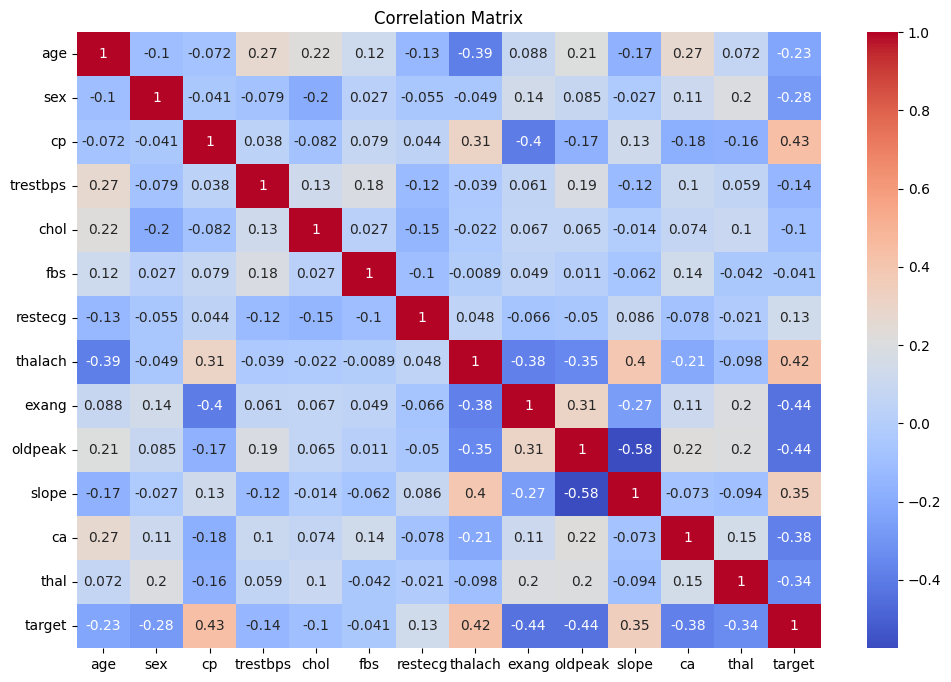

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

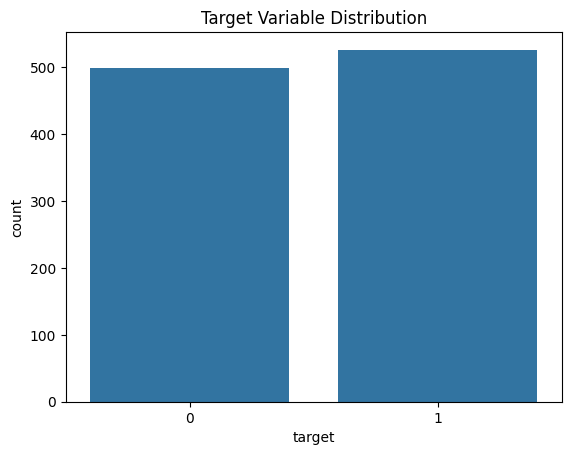

In [8]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

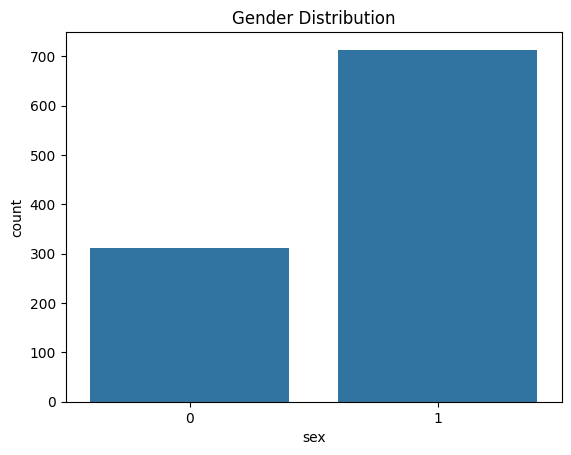

In [9]:
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

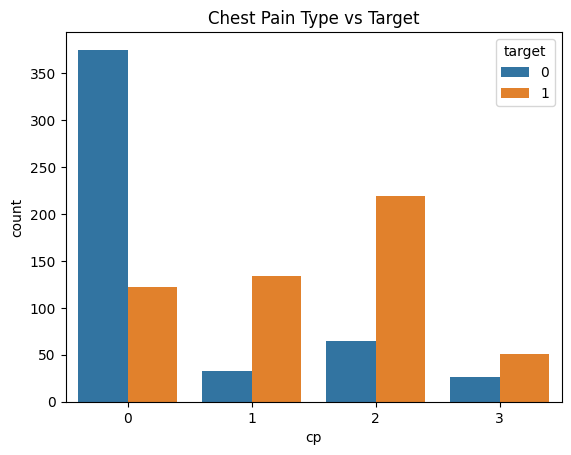

In [10]:
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Target')
plt.show()

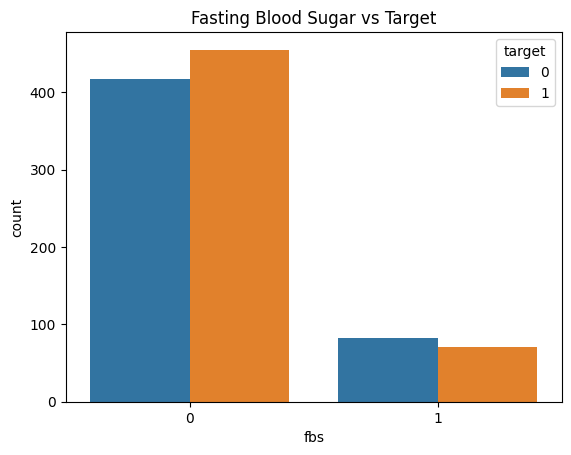

In [11]:
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting Blood Sugar vs Target')
plt.show()

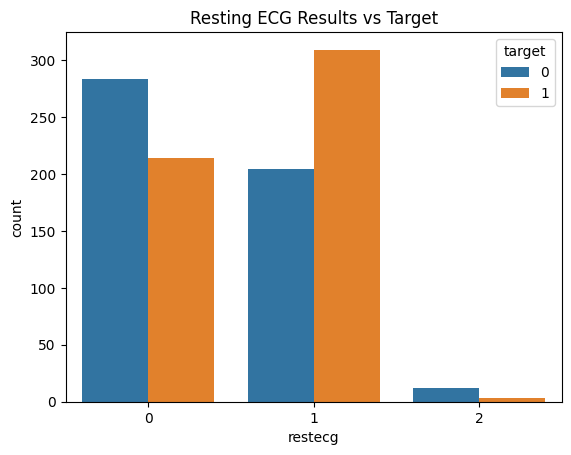

In [12]:
sns.countplot(x='restecg', hue='target', data=df)
plt.title('Resting ECG Results vs Target')
plt.show()

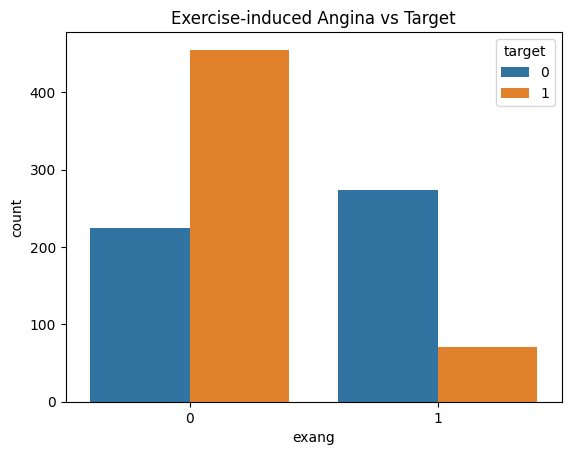

In [13]:
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise-induced Angina vs Target')
plt.show()

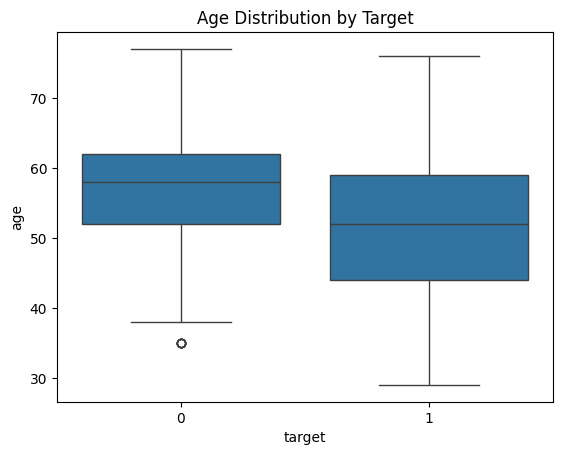

In [14]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Target')
plt.show()

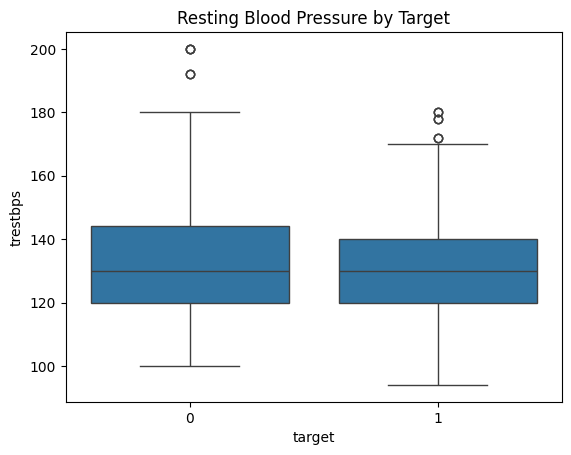

In [15]:
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure by Target')
plt.show()

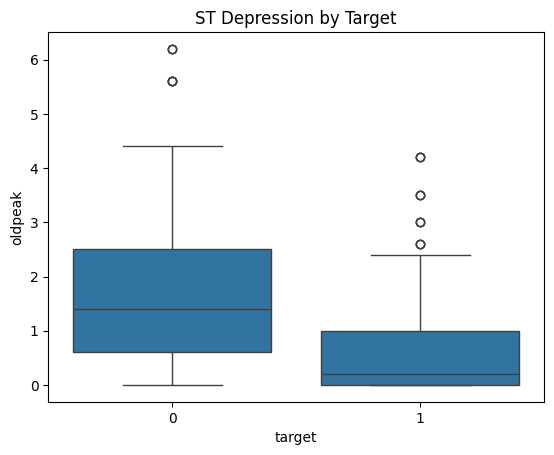

In [16]:
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('ST Depression by Target')
plt.show()

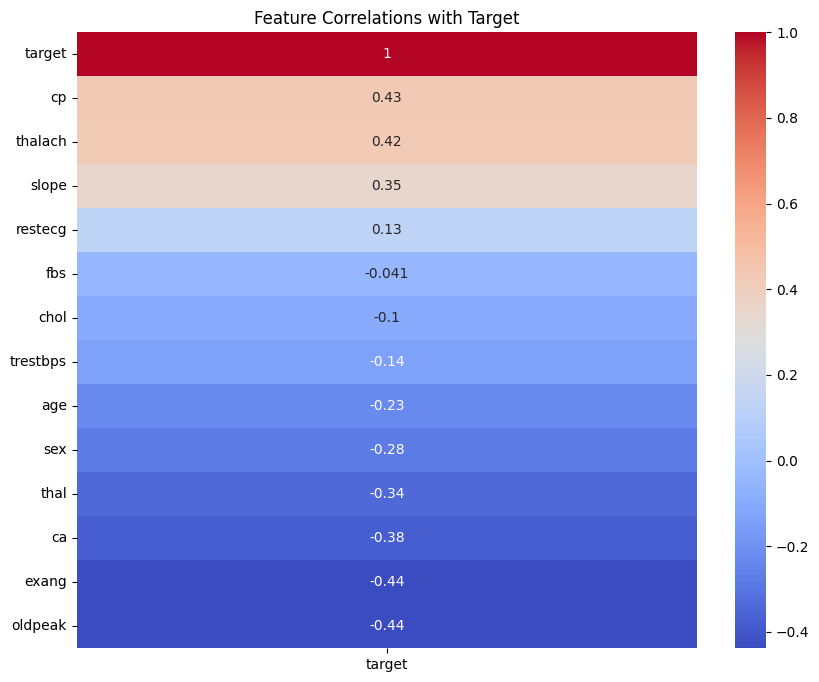

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with Target')
plt.show()


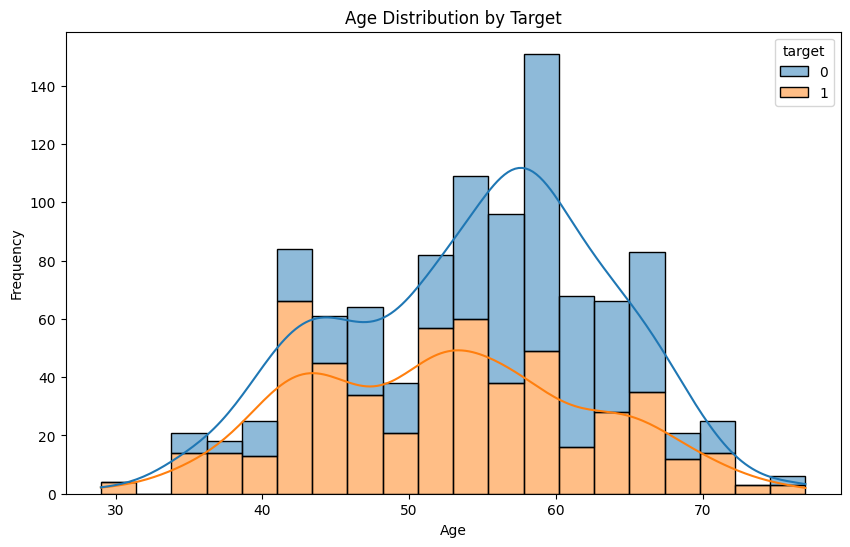

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

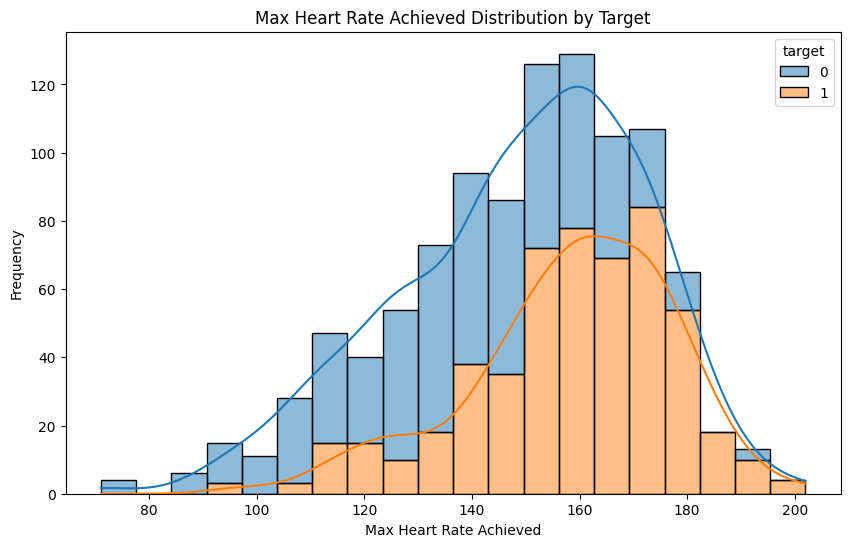

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thalach', hue='target', multiple='stack', bins=20, kde=True)
plt.title('Max Heart Rate Achieved Distribution by Target')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

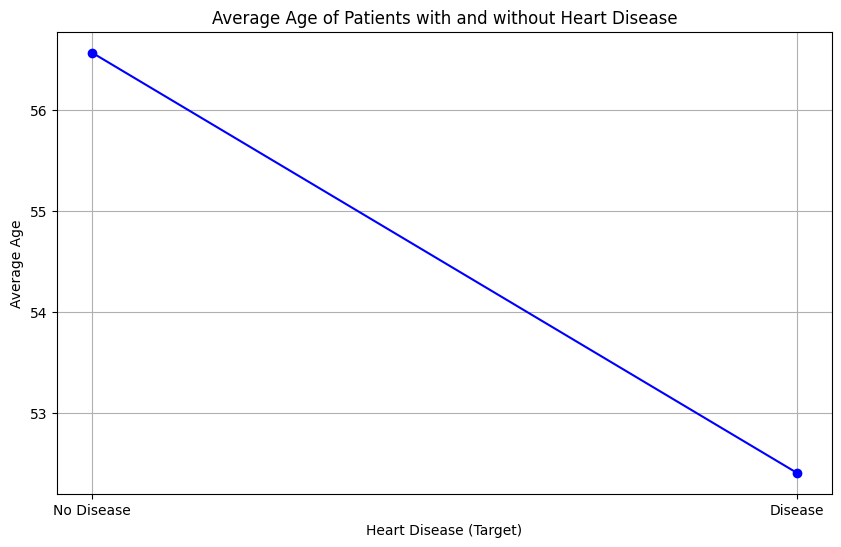

In [20]:
age_distribution = df.groupby('target')['age'].mean()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Average Age of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (Target)')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.ylabel('Average Age')
plt.grid()
plt.show()

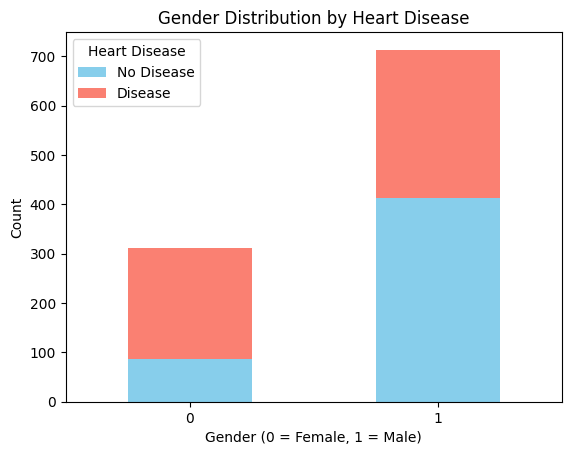

In [21]:
gender_distribution = df.groupby(['sex', 'target']).size().unstack()
gender_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Gender Distribution by Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

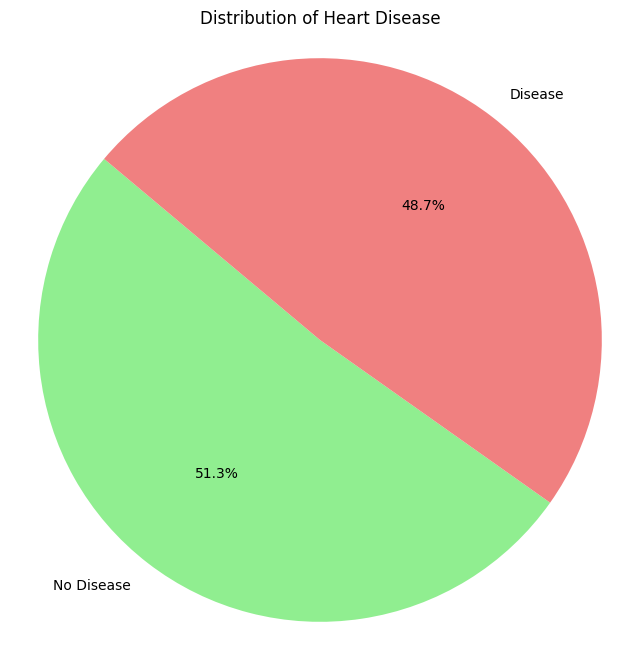

In [22]:
target_counts = df['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Heart Disease')
plt.axis('equal')  
plt.show()

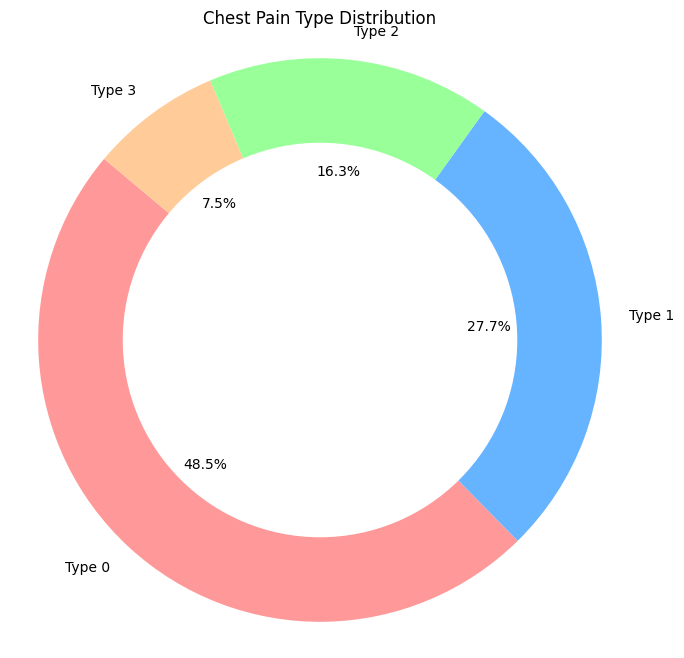

In [23]:
chest_pain_counts = df['cp'].value_counts()
chest_pain_labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']

# Create donut chart
plt.figure(figsize=(8, 8))
plt.pie(chest_pain_counts, labels=chest_pain_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Chest Pain Type Distribution')
plt.axis('equal')
plt.show()

C:\Users\SRIKAR\AppData\Local\Temp\ipykernel_23992\769663425.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_cholesterol = df.groupby('age_group')['chol'].mean()


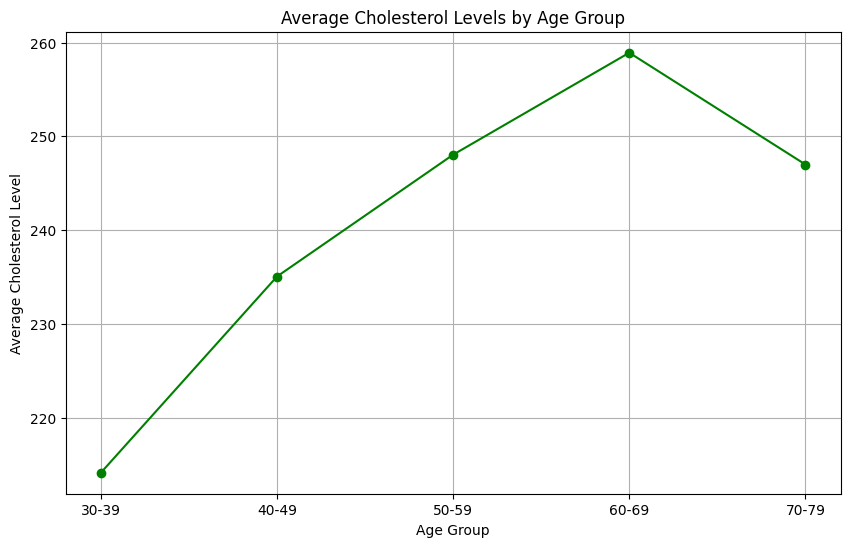

In [24]:
age_bins = [29, 39, 49, 59, 69, 79]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

average_cholesterol = df.groupby('age_group')['chol'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_cholesterol.index, average_cholesterol.values, marker='o', linestyle='-', color='green')
plt.title('Average Cholesterol Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol Level')
plt.grid()
plt.show()

C:\Users\SRIKAR\AppData\Local\Temp\ipykernel_23992\3098373426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='viridis')


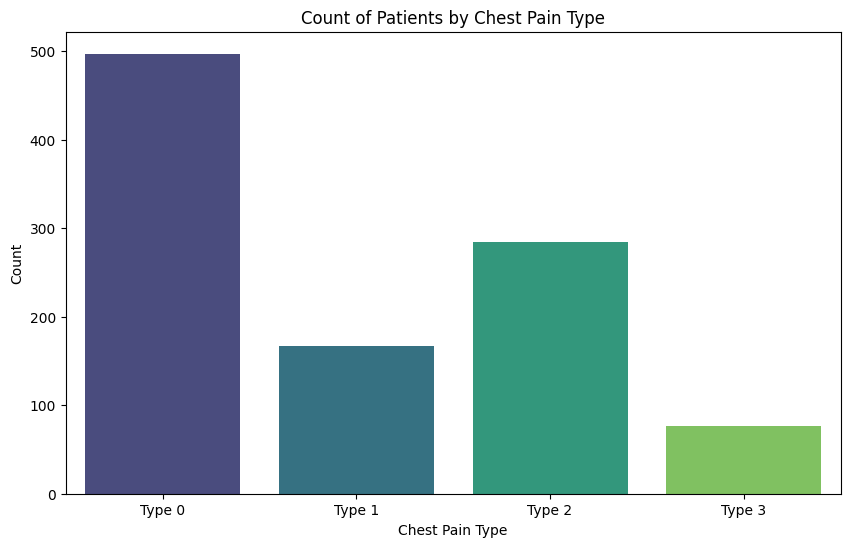

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=df, palette='viridis')
plt.title('Count of Patients by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Type 0', 'Type 1', 'Type 2', 'Type 3'])
plt.show()

C:\Users\SRIKAR\AppData\Local\Temp\ipykernel_23992\3803871037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fbs', data=df, palette='mako')


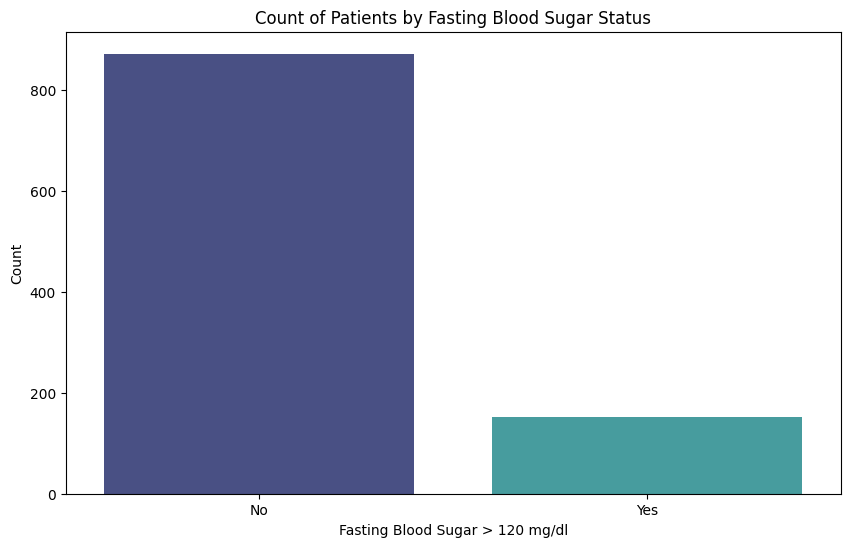

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fbs', data=df, palette='mako')
plt.title('Count of Patients by Fasting Blood Sugar Status')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [55]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age_group']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [56]:
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')


In [57]:
X = df.drop('target', axis=1)
y = df['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)


In [62]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [65]:
model_accuracies = {}

In [66]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [67]:
y_pred_logistic = logistic_model.predict(X_test)

In [68]:
y_pred_logistic

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0])

In [71]:
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_accuracy

0.7951219512195122

In [70]:
model_accuracies['Logistic Regression'] = logistic_accuracy

## Decision Tree

In [75]:
tree_model = DecisionTreeClassifier(random_state=42)

In [76]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred_tree = tree_model.predict(X_test)

In [78]:
tree_accuracy = accuracy_score(y_test, y_pred_tree)

In [79]:
tree_accuracy

0.9853658536585366

In [80]:
model_accuracies['Decision Tree'] = tree_accuracy

## Random Forest

In [81]:
forest_model = RandomForestClassifier(random_state=42)

In [82]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred_forest = forest_model.predict(X_test)

In [86]:
forest_accuracy = accuracy_score(y_test, y_pred_forest)

forest_accuracy

1.0

In [85]:
model_accuracies['Random Forest'] = forest_accuracy

## SVM

In [87]:
svm_model = SVC(random_state=42)

In [88]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [89]:
y_pred_svm = svm_model.predict(X_test)

In [93]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)

svm_accuracy

0.8829268292682927

In [92]:
model_accuracies['Support Vector Machine'] = svm_accuracy

In [94]:
comparison_df = pd.DataFrame(model_accuracies.items(), columns=['Model', 'Accuracy'])
print(comparison_df)

                    Model  Accuracy
0     Logistic Regression  0.795122
1           Decision Tree  0.985366
2           Random Forest  1.000000
3  Support Vector Machine  0.882927


In [95]:
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracies[best_model]:.2f}")



Best Model: Random Forest with Accuracy: 1.00


In [98]:
if best_model == 'Logistic Regression':
    print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))
elif best_model == 'Decision Tree':
    print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))
elif best_model == 'Random Forest':
    print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_forest))
elif best_model == 'Support Vector Machine':
    print("\nClassification Report (Support Vector Machine):\n", classification_report(y_test, y_pred_svm))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

